# **CPCS-433 Project - SVM Model**                                                    
  **GROUP 4**

---
This project aims to train and develop different machine learning models and
compare their performances. They will be trained to differentiate between 7 different
types of beans based on their features. This project will identify the best performing
model for this task and highlight their differences.

The model used here is Support Vector Machines (SVM), this algorithm is effective for high-dimensional datasets like ours and will be tested with various kernels.


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay

## Step1: Load the dataset

In [9]:
# download the dataset file from the google drive to the google colab
!gdown --id 1wZhMcpmnCX7YtWx8XfumrpL4CnMhDFNi

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1wZhMcpmnCX7YtWx8XfumrpL4CnMhDFNi
To: /content/Dry_Bean_Dataset.csv
100% 2.48M/2.48M [00:00<00:00, 159MB/s]


In [10]:
# Loading Data
data = pd.read_csv("/content/Dry_Bean_Dataset.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

## Step2: Preprocess the data

### The missing values

In [11]:
# Handle missing values if any (check for NaNs)
print('Number of Null values:', data.isnull().sum().sum())

Number of Null values: 0


### The outliers


In [12]:
# Identify and remove outliers using Z-score
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
z_scores = zscore(data[numerical_columns])
outliers = (np.abs(z_scores) > 3).any(axis=1)
print("Dataset Shape before outlier removal:", data.shape)
data = data[~outliers].reset_index(drop=True)
print("Final Dataset shape after outlier removal:", data.shape)

Dataset Shape before outlier removal: (13611, 17)
Final Dataset shape after outlier removal: (12487, 17)


### Split the dataset into training and testing sets and standardize it

In [13]:
# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Split the data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Step3: SVM model training

In [16]:
# Define the Support Vector Machine (SVM) model
svm_model = SVC(random_state=42)

# Set up the hyperparameter grid for SVM
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters found:", grid_search.best_params_)

# Train the SVM model with the optimal parameters
best_svm = grid_search.best_estimator_
best_svm.fit(X_train, y_train)

Best hyperparameters found: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


SVC(C=10, gamma='auto', random_state=42)

## Step4: Model Evaluation

Evaluation Metrics for Support Vector Machines (SVM):
Model Accuracy: 0.9283426741393115
Model Precision: 0.9290396247271151
Model Recall: 0.9283426741393115
Model F1-Score: 0.9285061751600848

Classification Report:
               precision    recall  f1-score   support

    BARBUNYA       0.97      0.94      0.96       267
      BOMBAY       1.00      1.00      1.00         2
        CALI       0.95      0.97      0.96       321
    DERMASON       0.90      0.93      0.91       669
       HOROZ       0.98      0.93      0.95       321
       SEKER       0.96      0.95      0.95       386
        SIRA       0.88      0.88      0.88       532

    accuracy                           0.93      2498
   macro avg       0.95      0.94      0.95      2498
weighted avg       0.93      0.93      0.93      2498



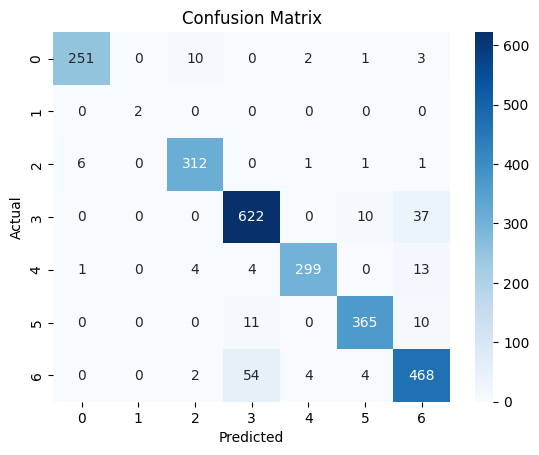

In [17]:
# Evaluate the model
y_pred = best_svm.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print("Evaluation Metrics for Support Vector Machines (SVM):")
print("Model Accuracy:", accuracy)
print("Model Precision:", precision)
print("Model Recall:", recall)
print("Model F1-Score:", f1)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()